import libraries

In [1]:
import os
os.environ["CELLPOSE_LOCAL_MODELS_PATH"] = "/PATH_FOR_MODELS/"
import time
time.sleep(0.5)
import numpy as np
import time, os, sys
import matplotlib.pyplot as plt
time.sleep(0.5)

import skimage.io
time.sleep(0.5)
from cellpose import utils, io
from cellpose import models

import tkinter as tk
from tkinter import filedialog
import cv2
from tifffile import imsave

select the image

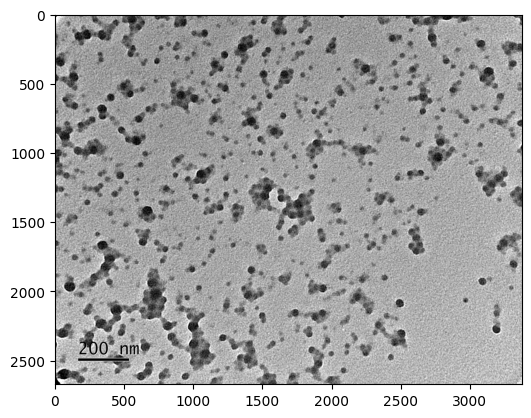

In [2]:
root = tk.Tk()
root.withdraw()

file_path = filedialog.askopenfilename()
stack = skimage.io.imread(file_path)
plt.imshow(stack, cmap='gray')
data=stack

inverse gray image

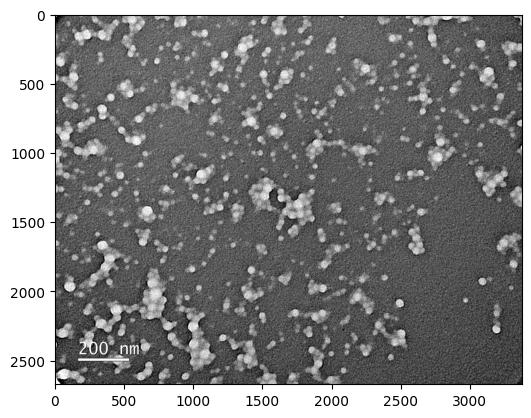

In [3]:
data=255-stack
plt.imshow(data, cmap='gray')

run cellpose 
choose model 'cyto' or 'nuclei' and diameter size


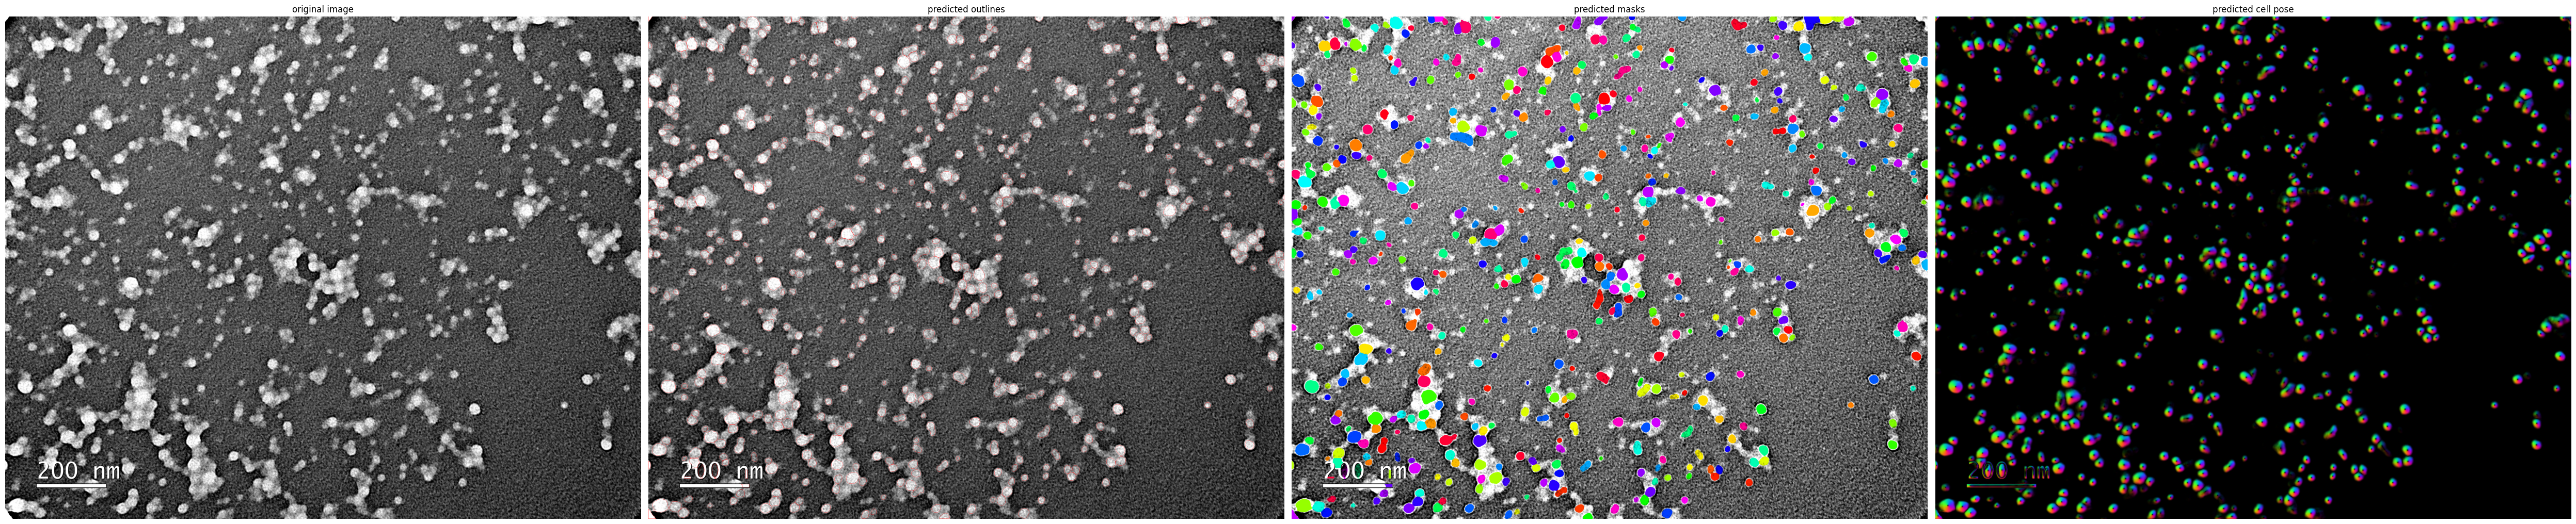

In [10]:
# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=False, model_type='nuclei')
channels = [0,0] # IF YOU HAVE GRAYSCALE

masks, flows, styles, diams = model.eval(data, diameter=35, channels=channels)

# DISPLAY RESULTS
from cellpose import plot

fig = plt.figure(figsize=(50,20))
plot.show_segmentation(fig, data, masks, flows[0], channels=channels)
plt.tight_layout()
plt.show()

extract the diameter of the mask and print the mean diameter

In [15]:
DIAM=utils.diameters(masks)
dd=DIAM[1];
print('mean diameter =', np.mean(dd),'pixels')
print('number of particles=',dd.size)

mean diameter = 37.06736292116513 pixels
number of particles= 532


plot histogram of the values

(array([ 4., 10., 18., 38., 49., 66., 69., 52., 56., 49., 37., 25., 14.,
        22., 13.,  6.,  1.,  2.,  0.,  1.]),
 array([12.68857754, 15.89179117, 19.0950048 , 22.29821843, 25.50143205,
        28.70464568, 31.90785931, 35.11107294, 38.31428657, 41.5175002 ,
        44.72071383, 47.92392745, 51.12714108, 54.33035471, 57.53356834,
        60.73678197, 63.9399956 , 67.14320922, 70.34642285, 73.54963648,
        76.75285011]),
 <BarContainer object of 20 artists>)

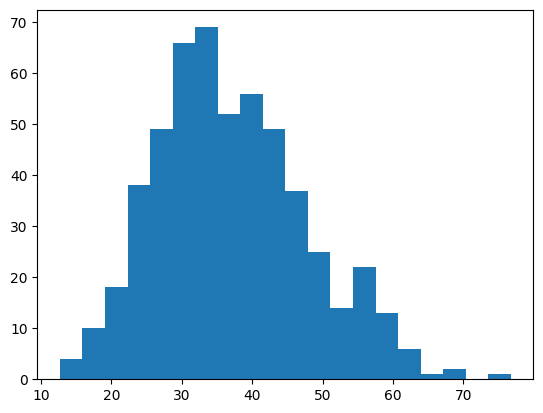

In [16]:
plt.hist(dd,20)